In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import *
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings('ignore')

# Exploratory Data Analysis

In [2]:
df=pd.read_csv("stroke.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
df.shape

(5110, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


<AxesSubplot:>

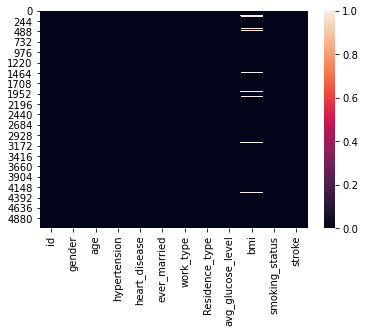

In [6]:
sns.heatmap(df.isnull())

In [7]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

## Feature Distribution

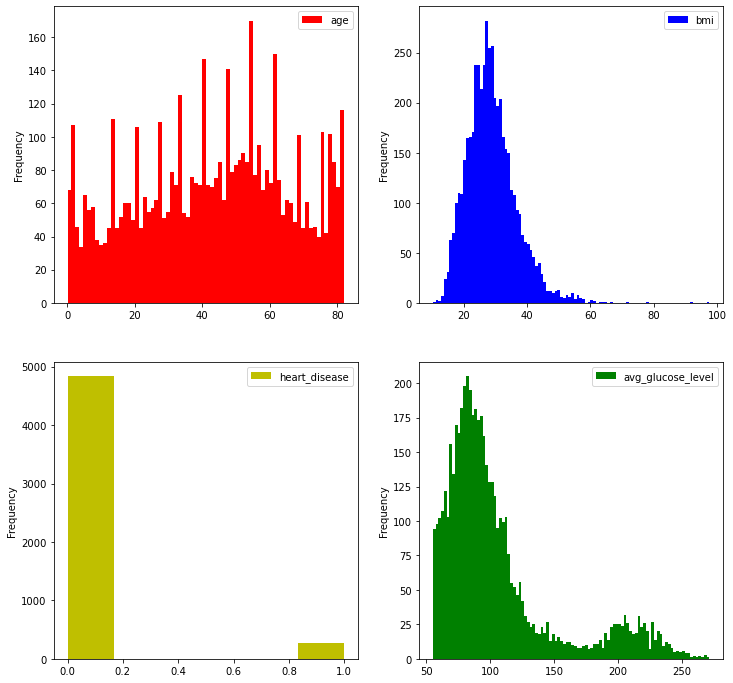

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
df.plot(kind="hist", y="age", bins=70, color="r", ax=axes[0][0])
df.plot(kind="hist", y="bmi", bins=100, color="b", ax=axes[0][1])
df.plot(kind="hist", y="heart_disease", bins=6, color="y", ax=axes[1][0])
df.plot(kind="hist", y="avg_glucose_level", bins=100, color="g", ax=axes[1][1])
plt.show()

## Visualization 

<AxesSubplot:>

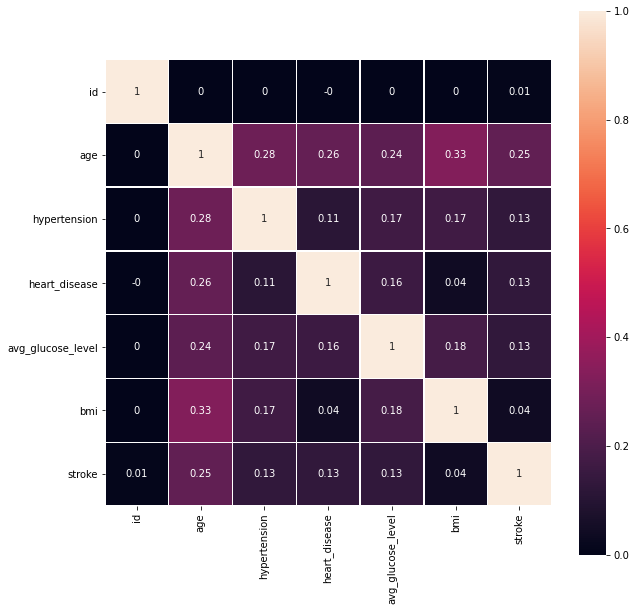

In [9]:
plt.figure(figsize=(10,10))
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, square=True, linewidths=0.5, linecolor='white')

<AxesSubplot:title={'center':'Stroke vs No Stroke'}, ylabel='stroke'>

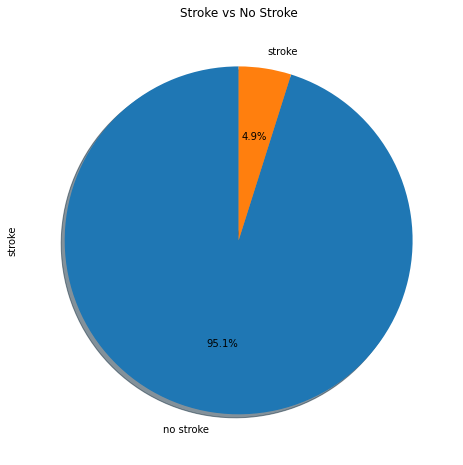

In [10]:
fig = plt.subplots(1,figsize=(8,8))
labels = 'no stroke', 'stroke'
plt.title("Stroke vs No Stroke")
df.stroke.value_counts().plot.pie(labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)

<AxesSubplot:xlabel='stroke', ylabel='count'>

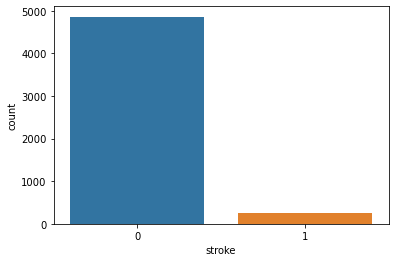

In [11]:
sns.countplot(x='stroke', data=df)

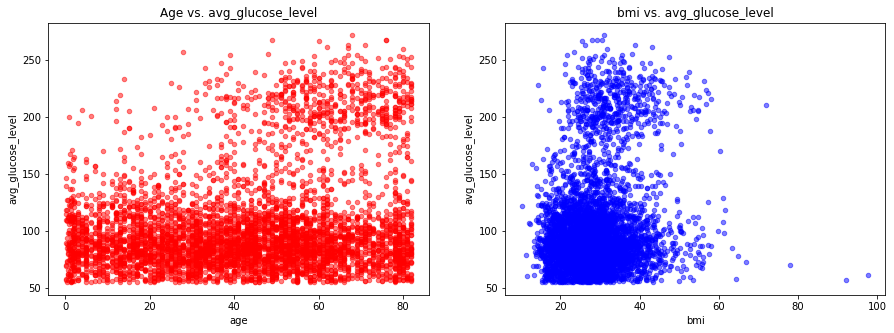

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
df.plot(kind='scatter', x='age', y='avg_glucose_level', alpha=0.5, color='red', ax=axes[0], title="Age vs. avg_glucose_level")
df.plot(kind='scatter', x='bmi', y='avg_glucose_level', alpha=0.5, color='blue', ax=axes[1], title="bmi vs. avg_glucose_level")
plt.show()

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

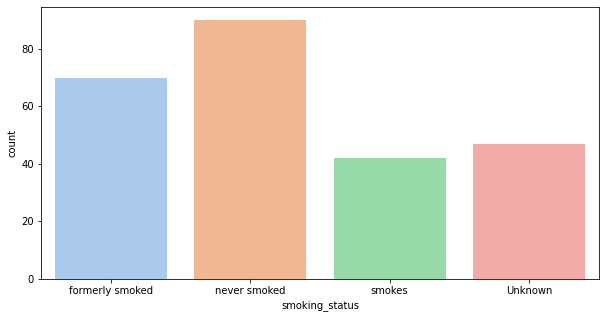

In [13]:
plt.figure(figsize=(10,5))
strokes=df.loc[df['stroke']==1]
sns.countplot(data=strokes,x='smoking_status',palette='pastel')

Text(0.5, 1.0, 'Work types that could expose to strokes')

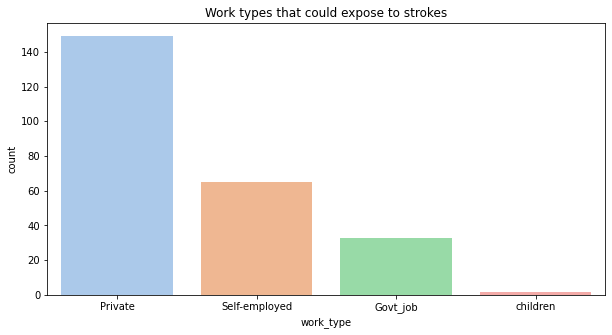

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(data=strokes,x='work_type',palette='pastel').set_title("Work types that could expose to strokes")

Text(0.5, 1.0, 'Those with heart disease that suffer strokes')

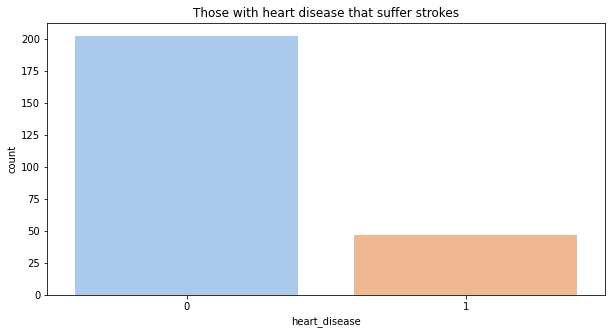

In [15]:
plt.figure(figsize=(10,5))
sns.countplot(data=strokes, x="heart_disease", palette='pastel').set_title("Those with heart disease that suffer strokes")

Text(0.5, 1.0, 'Residences that exposes you to strokes')

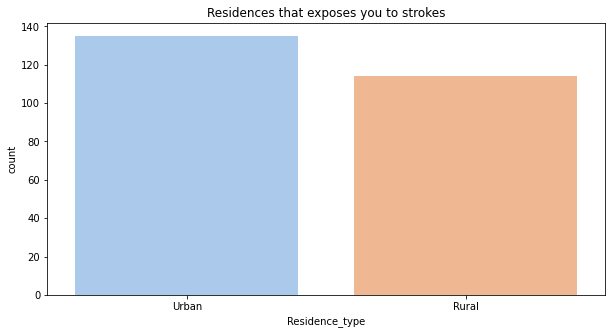

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(data=strokes, x="Residence_type", palette='pastel').set_title("Residences that exposes you to strokes")

Text(0.5, 1.0, 'Significance of hypertension on strokes')

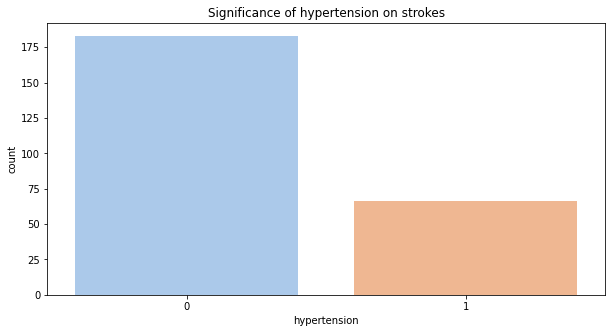

In [17]:
plt.figure(figsize=(10,5))
sns.countplot(data=strokes, x="hypertension", palette='pastel').set_title("Significance of hypertension on strokes")

## Data Pre-processing

In [18]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


<AxesSubplot:xlabel='bmi'>

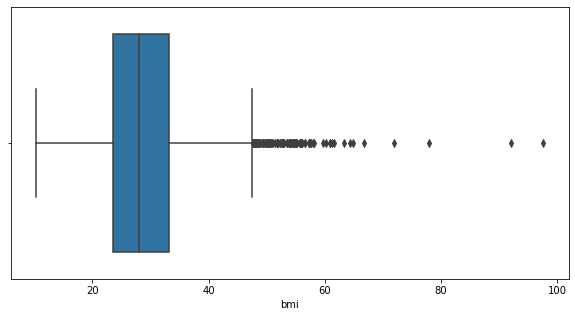

In [19]:
fig, ax =plt.subplots(figsize=(10,5))
sns.boxplot(df.bmi)

<AxesSubplot:xlabel='bmi', ylabel='Density'>

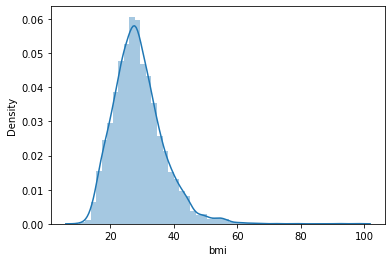

In [20]:
sns.distplot(df.bmi)

In [21]:
df["bmi"] = df["bmi"].fillna(df["bmi"].median())

In [22]:
print(df['gender'].unique())
print(df['ever_married'].unique())
print(df['work_type'].unique())
print(df['Residence_type'].unique())
print(df['smoking_status'].unique())

['Male' 'Female' 'Other']
['Yes' 'No']
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
['Urban' 'Rural']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [23]:
df=df.drop('id',axis=1)

In [24]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## Binary features 

In [25]:
df['ever_married']=df['ever_married'].replace({'No': 0, 'Yes': 1})
df['Residence_type'] = df['Residence_type'].replace({'Rural': 0, 'Urban': 1})

In [26]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,1,Self-employed,0,202.21,28.1,never smoked,1
2,Male,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1
3,Female,49.0,0,0,1,Private,1,171.23,34.4,smokes,1
4,Female,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,1,Private,1,83.75,28.1,never smoked,0
5106,Female,81.0,0,0,1,Self-employed,1,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,1,Self-employed,0,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,1,Private,0,166.29,25.6,formerly smoked,0


## One-Hot Encoding 

In [27]:
def onehotencoding(df, column):
    df=df.copy()
    dummies=pd.get_dummies(df[column], prefix=column)
    df=pd.concat([df, dummies],axis=1)
    df=df.drop(column, axis=1)
    return df

In [28]:
for column in ['gender', 'work_type', 'smoking_status']:
    df=onehotencoding(df, column=column)


In [29]:
df

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,1,1,228.69,36.6,1,0,1,0,0,0,1,0,0,0,1,0,0
1,61.0,0,0,1,0,202.21,28.1,1,1,0,0,0,0,0,1,0,0,0,1,0
2,80.0,0,1,1,0,105.92,32.5,1,0,1,0,0,0,1,0,0,0,0,1,0
3,49.0,0,0,1,1,171.23,34.4,1,1,0,0,0,0,1,0,0,0,0,0,1
4,79.0,1,0,1,0,174.12,24.0,1,1,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,1,1,83.75,28.1,0,1,0,0,0,0,1,0,0,0,0,1,0
5106,81.0,0,0,1,1,125.20,40.0,0,1,0,0,0,0,0,1,0,0,0,1,0
5107,35.0,0,0,1,0,82.99,30.6,0,1,0,0,0,0,0,1,0,0,0,1,0
5108,51.0,0,0,1,0,166.29,25.6,0,0,1,0,0,0,1,0,0,0,1,0,0


## Dealing with class Imbalance

In [30]:
df_oversampled=df.copy()
df_oversampled.shape

(5110, 20)

# Splitting dataset for ML algorithms

In [31]:
over = RandomOverSampler(sampling_strategy='minority')
X_over = df_oversampled.drop('stroke', axis=1)
y_over=df_oversampled['stroke']
X_over, y_over = over.fit_resample(X_over, y_over)


In [32]:
#Splitting original dataframe using test_train_split
X= df.drop('stroke', axis=1)
y=df['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
#Splitting the oversampled dataframe using test_train_split
X_train_over, X_test_over, y_train_over, y_test_over= train_test_split(X_over, y_over, test_size=0.2, random_state=42)

## Scaling the data 

In [34]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)
X_train_over_scaled= sc.fit_transform(X_train_over)
X_test_over_scaled=sc.transform(X_test_over)

# Default Logistic Regression Model

Accuracy of the model: 0.939
Train f1 Score: 0.010638297872340425
Test f1 Score: 0.0


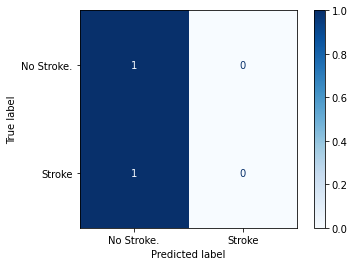

In [35]:
model = LogisticRegression(max_iter=1000, random_state=0)

model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

logistic_accuracy=model.score(X_test, y_test)
train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("Accuracy of the model: {:.3f}".format(logistic_accuracy))
print(f"Train f1 Score: {train_f1}")
print(f"Test f1 Score: {test_f1}")

plot_confusion_matrix(model, X_test, y_test, cmap='Blues', normalize='true',
                     display_labels=['No Stroke.', 'Stroke']);

# Oversampled Logistic Regression Model

Accuracy of the oversampled model: 0.772
Train f1 Score: 0.785687755354711
Test f1 Score: 0.7788844621513944


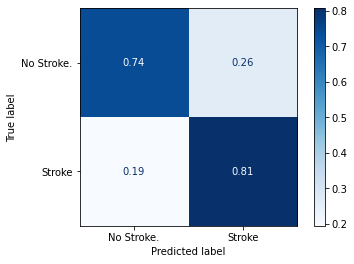

In [36]:
model = LogisticRegression(max_iter=1000, random_state=0)

model.fit(X_train_over, y_train_over)
y_test_pred = model.predict(X_test_over)
y_train_pred = model.predict(X_train_over)

logistic_over_accuracy=model.score(X_test_over, y_test_over)
train_f1 = f1_score(y_train_over, y_train_pred)
test_f1 = f1_score(y_test_over, y_test_pred)

print("Accuracy of the oversampled model: {:.3f}".format(logistic_over_accuracy))
print(f"Train f1 Score: {train_f1}")
print(f"Test f1 Score: {test_f1}")

plot_confusion_matrix(model, X_test_over, y_test_over, cmap='Blues', normalize='true',
                     display_labels=['No Stroke.', 'Stroke']);

# Scaled Logistic Regression

Accuracy of the model: 0.939
Train f1 Score: 0.010638297872340425
Test f1 Score: 0.0


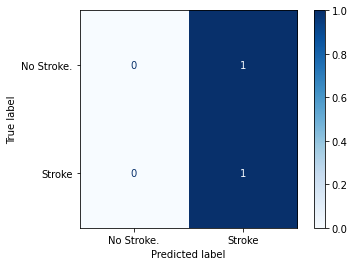

In [37]:
model = LogisticRegression(max_iter=1000, random_state=0)

model.fit(X_train_scaled, y_train)
y_test_pred = model.predict(X_test_scaled)
y_train_pred = model.predict(X_train_scaled)

logistic_scaled_accuracy=model.score(X_test_scaled, y_test)
train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("Accuracy of the model: {:.3f}".format(logistic_scaled_accuracy))
print(f"Train f1 Score: {train_f1}")
print(f"Test f1 Score: {test_f1}")

plot_confusion_matrix(model, X_test, y_test, cmap='Blues', normalize='true',
                     display_labels=['No Stroke.', 'Stroke']);

# Default Random Forest Model 

Accuracy of the model: 0.938
Train f1 Score: 0.9973190348525469
Test f1 Score: 0.0


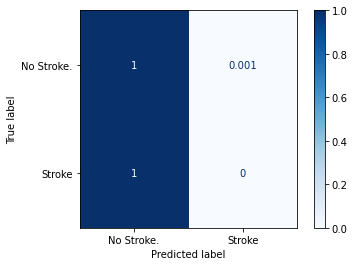

In [38]:
model = RandomForestClassifier(random_state=0)

model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

rf_accuracy=model.score(X_test, y_test)
train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("Accuracy of the model: {:.3f}".format(rf_accuracy))
print(f"Train f1 Score: {train_f1}")
print(f"Test f1 Score: {test_f1}")

plot_confusion_matrix(model, X_test, y_test, cmap='Blues', normalize='true',
                     display_labels=['No Stroke.', 'Stroke']);

# Random Forest Oversampled Model

Accuracy of the oversampled model: 0.992
Train f1 Score: 1.0
Test f1 Score: 0.9923273657289001


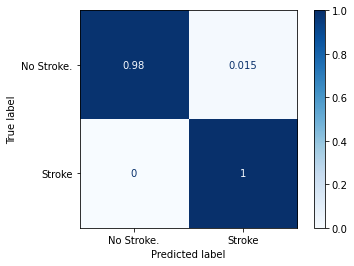

In [39]:
model = RandomForestClassifier(random_state=0)

model.fit(X_train_over, y_train_over)
y_test_pred = model.predict(X_test_over)
y_train_pred = model.predict(X_train_over)

rf_over_accuracy=model.score(X_test_over, y_test_over)
train_f1 = f1_score(y_train_over, y_train_pred)
test_f1 = f1_score(y_test_over, y_test_pred)

print("Accuracy of the oversampled model: {:.3f}".format(rf_over_accuracy))
print(f"Train f1 Score: {train_f1}")
print(f"Test f1 Score: {test_f1}")

plot_confusion_matrix(model, X_test_over, y_test_over, cmap='Blues', normalize='true',
                     display_labels=['No Stroke.', 'Stroke']);

# Scaled Random Forest Model

Accuracy of the model: 0.938
Train f1 Score: 0.9973190348525469
Test f1 Score: 0.0


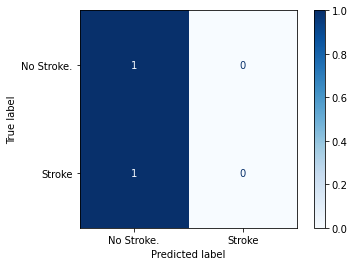

In [40]:
model = RandomForestClassifier(random_state=0)

model.fit(X_train_scaled, y_train)
y_test_pred = model.predict(X_test_scaled)
y_train_pred = model.predict(X_train_scaled)

rf_scaled_accuracy=model.score(X_test_scaled, y_test)
train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("Accuracy of the model: {:.3f}".format(rf_scaled_accuracy))
print(f"Train f1 Score: {train_f1}")
print(f"Test f1 Score: {test_f1}")

plot_confusion_matrix(model, X_test, y_test, cmap='Blues', normalize='true',
                     display_labels=['No Stroke.', 'Stroke']);

# Default GaussianNB

Accuracy of the model: 0.548
Train f1 Score: 0.15577190542420027
Test f1 Score: 0.20344827586206898


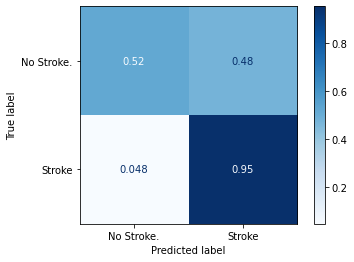

In [41]:
model=GaussianNB()

model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

nb_accuracy=model.score(X_test, y_test)
train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)


print("Accuracy of the model: {:.3f}".format(nb_accuracy))
print(f"Train f1 Score: {train_f1}")
print(f"Test f1 Score: {test_f1}")

plot_confusion_matrix(model, X_test, y_test, cmap='Blues', normalize='true',
                     display_labels=['No Stroke.', 'Stroke']);

# Oversampled GaussianNB

Accuracy of the oversampled model: 0.653
Train f1 Score: 0.735024799694773
Test f1 Score: 0.7408829174664109


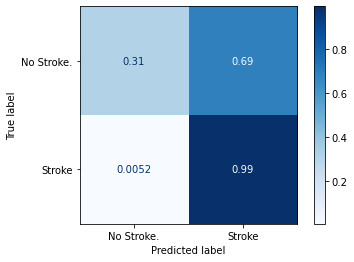

In [42]:
model=GaussianNB()

model.fit(X_train_over, y_train_over)
y_test_pred = model.predict(X_test_over)
y_train_pred = model.predict(X_train_over)

nb_over_accuracy=model.score(X_test_over, y_test_over)
train_f1 = f1_score(y_train_over, y_train_pred)
test_f1 = f1_score(y_test_over, y_test_pred)

print("Accuracy of the oversampled model: {:.3f}".format(nb_over_accuracy))
print(f"Train f1 Score: {train_f1}")
print(f"Test f1 Score: {test_f1}")

plot_confusion_matrix(model, X_test_over, y_test_over, cmap='Blues', normalize='true',
                     display_labels=['No Stroke.', 'Stroke']);

# Scaled GaussianNB

Accuracy of the model: 0.298
Train f1 Score: 0.11101110111011099
Test f1 Score: 0.14744351961950058


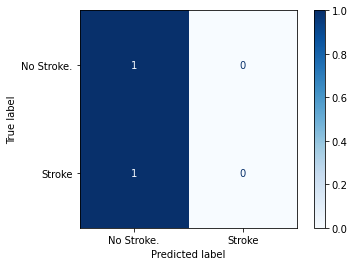

In [43]:
model=GaussianNB()

model.fit(X_train_scaled, y_train)
y_test_pred = model.predict(X_test_scaled)
y_train_pred = model.predict(X_train_scaled)

nb_scaled_accuracy=model.score(X_test_scaled, y_test)
train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("Accuracy of the model: {:.3f}".format(nb_scaled_accuracy))
print(f"Train f1 Score: {train_f1}")
print(f"Test f1 Score: {test_f1}")

plot_confusion_matrix(model, X_test, y_test, cmap='Blues', normalize='true',
                     display_labels=['No Stroke.', 'Stroke']);

# Hyperparameter tuning

# Logistic Regression Grid Search 

In [44]:
#Setting up a dictionary 'param_grid' with all the parameters and their corresponding values that needs to be tested for best performance
solvers_list = ['newton-cg', 'lbfgs', 'liblinear']
c_values = [100, 10, 1.0, 0.1, 0.01]
penalty = ['l2']
param_grid=dict(solver=solvers_list,penalty=penalty,C=c_values)
print(param_grid)

{'solver': ['newton-cg', 'lbfgs', 'liblinear'], 'penalty': ['l2'], 'C': [100, 10, 1.0, 0.1, 0.01]}


In [45]:
#Create an instance of the GridSearch class and passing in the Logistic Regression model and the parameter dictionary defined above with a 5 fold validation
#And outputting a dataframe with all the combinations of parameters used
#start_time=time.time()
grid = GridSearchCV(LogisticRegression(max_iter=10000), param_grid, cv=5, scoring='f1_micro', return_train_score=False, n_jobs=-1)
grid.fit(X,y)
#print("Time taken to compute: {:.3f}".format(time.time()-start_time))
pd.DataFrame(grid.cv_results_)[["mean_test_score", "params"]]

,mean_test_score,params
0,0.951468,"{'C': 100, 'penalty': 'l2', 'solver': 'newton-..."
1,0.951468,"{'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}"
2,0.951468,"{'C': 100, 'penalty': 'l2', 'solver': 'libline..."
3,0.951468,"{'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}"
4,0.951468,"{'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}"
5,0.951468,"{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}"
6,0.951468,"{'C': 1.0, 'penalty': 'l2', 'solver': 'newton-..."
7,0.951468,"{'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}"
8,0.951272,"{'C': 1.0, 'penalty': 'l2', 'solver': 'libline..."
9,0.951468,"{'C': 0.1, 'penalty': 'l2', 'solver': 'newton-..."


In [46]:
#Outputting the accuracy achived using the best parameters.
logistic_grid_bm=grid.best_score_
logistic_grid_bp=grid.best_params_
print("Best models accuracy is:{:.3f} ".format(logistic_grid_bm))
print("Used values: ", logistic_grid_bp)

Best models accuracy is:0.951 
Used values:  {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}


# Random Forest Grid Search

In [ ]:
criterion_list=["gini", "entropy"]
max_features_list=["auto", "sqrt", "log2"]
max_depth_list=[2,4,6,8]
param_grid=dict(criterion=criterion_list, max_features=max_features_list, max_depth=max_depth_list)
print(param_grid)

In [ ]:
grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy', return_train_score=False, n_jobs=-1)
grid.fit(X,y)
#print("Time taken to compute: {:.3f}".format(time.time()-start_time))
pd.DataFrame(grid.cv_results_)[["mean_test_score", "params"]]

In [ ]:
rf_grid_bm=grid.best_score_
rf_grid_bp=grid.best_params_
print("Best models accuracy is:{:.3f} ".format(rf_grid_bm))
print("Used values: ", rf_grid_bp)

# GaussianNB Grid Search

In [ ]:
nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB, 
                 cv=5,   
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(X,y)

gs_NB.best_params_

In [ ]:
#Reference:
#Ashour. A (2021) 'Stroke_Prediction EDA' [online] available from <https://www.kaggle.com/code/ahmedterry/stroke-prediction-eda-classification-models/notebook> [3rd January 2022]